<center><h1>实习岗位状况的分析</h1></center> 

<h2>1.分析目标</h2>

1.学历与岗位需求量分析
<br>
2.城市与岗位需求量分析
<br>
3.薪资水平分析
<br>
4.公司规模分析

<h2>2.分析内容</h2>

1.首先读取数据文件全部信息;
<br>
2.然后提前对需要的信息并进行数据清洗、处理;
<br>
3.接着对提取的干净信息进行统计分析;
<br>
4.最后实现数据可视化。

<h2>3.分析步骤</h2>

<h3>3.1csv文件信息读取</h3>
<br>
读取文件信息并去重，保存成DataFrame格式;

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#内嵌画图
%matplotlib inline 
import seaborn as sns #seaborn就是在matplotlib基础上面的封装，方便直接传参数调用
from pyecharts.charts import Bar #导入设置系列配置和全局配置
from pyecharts import options as opts
#设置中文标签的显示
plt.rcParams['font.sans-serif']=['SimHei']#设置显示中文字体

In [15]:
#读取job_list.csv中的有效字段的数据
job_list_data = pd.read_csv('job_list.csv')[['city','cname','day','maxsal','minsal','name']]
job_list_data

,city,cname,day,maxsal,minsal,name
0,武汉,武汉安天,4,120,80,数据挖掘工程师
1,武汉,武汉安天,4,150,100,数据挖掘实习生
2,广州,网易游戏,4,200,100,语料数据标注实习生-广州
3,北京,中科院软件所,4,200,120,安全工程师
4,深圳,IDataAPI,5,200,100,自然语言处理（NLP）实习生
...,...,...,...,...,...,...
218,北京,妙计旅行,5,240,140,数据挖掘实习生
219,北京,百度,5,200,150,百度数据挖掘工程师实习生
220,北京,Baca,4,370,350,数据挖掘实习生
221,北京,汽车之家,4,180,140,数据分析实习生


In [16]:
#读取job_detailed.csv中有效字段的数据
job_detailed_data=pd.read_csv('job_detailed.csv')[['city','cname','day','degree','iname','industry','maxsal','minsal','month','attraction']]
job_detailed_data

,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶
1,武汉,武汉安天,4,硕士,数据挖掘实习生,互联网,150,100,3,弹性工作制
2,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐
3,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位
4,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战
...,...,...,...,...,...,...,...,...,...,...
218,北京,妙计旅行,5,本科,数据挖掘实习生,在线旅游,240,140,6,大牛带队，成长迅速，包三餐
219,北京,百度,5,本科,百度数据挖掘工程师实习生,互联网,200,150,6,福利待遇好 有转正机会
220,北京,Baca,4,本科,数据挖掘实习生,互联网,370,350,3,"出海项目,美金投资,团队大牛,学习成长"
221,北京,汽车之家,4,本科,数据分析实习生,互联网,180,140,4,足够强大的平台！


<h2>3.2数据清洗</h2>

In [17]:
print("原始行数:",len(job_detailed_data))

原始行数: 223


In [9]:
#去重，并生成新索引删除原索引
job_detailed_data=job_detailed_data.drop_duplicates().reset_index().drop('index',axis=1)
print('现在数据行数:',len(job_detailed_data))
job_detailed_data

现在数据行数: 200


,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶
1,武汉,武汉安天,4,硕士,数据挖掘实习生,互联网,150,100,3,弹性工作制
2,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐
3,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位
4,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战
...,...,...,...,...,...,...,...,...,...,...
195,北京,妙计旅行,5,本科,数据挖掘实习生,在线旅游,240,140,6,大牛带队，成长迅速，包三餐
196,北京,百度,5,本科,百度数据挖掘工程师实习生,互联网,200,150,6,福利待遇好 有转正机会
197,北京,Baca,4,本科,数据挖掘实习生,互联网,370,350,3,"出海项目,美金投资,团队大牛,学习成长"
198,北京,汽车之家,4,本科,数据分析实习生,互联网,180,140,4,足够强大的平台！


In [18]:
#提取需要的字段并去空
job_detailed_data=job_detailed_data[['city','cname','day','degree','iname','industry','maxsal','minsal','month','attraction']].dropna()
job_detailed_data.head()
print('现在数据行数:',len(job_detailed_data))

现在数据行数: 220


In [19]:
#看数据规模以及是否有缺失项
job_detailed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 222
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        220 non-null    object
 1   cname       220 non-null    object
 2   day         220 non-null    int64 
 3   degree      220 non-null    object
 4   iname       220 non-null    object
 5   industry    220 non-null    object
 6   maxsal      220 non-null    int64 
 7   minsal      220 non-null    int64 
 8   month       220 non-null    int64 
 9   attraction  220 non-null    object
dtypes: int64(4), object(6)
memory usage: 18.9+ KB


In [ ]:
把清洗之后的数据转存为.csv文件,导入Mysql数据库对数据进行处理之后，再读取修改之后的.csv文件

In [20]:
# job_detailed_data.to_csv('E:\\testjob.csv',encoding='utf-8')
job_detailed_data=pd.read_csv('E:\\mod_testjob.csv')[['city','cname','day','degree','iname','industry','maxsal','minsal','month','attraction']]
job_detailed_data.head()

,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶
1,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐
2,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位
3,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战
4,福州,鼎捷软件,5,本科,实施顾问（PLM）,计算机/互联网,600,500,3,五险一金、法定年假、福利年假、生日礼金、午餐补贴、出差补贴


<h2>4.数据分析</h2>

<h3>4.1学历与岗位数量</h3>

In [21]:
degree=job_detailed_data['degree'].value_counts()
degree

本科    124
硕士     36
不限     30
大专      6
Name: degree, dtype: int64

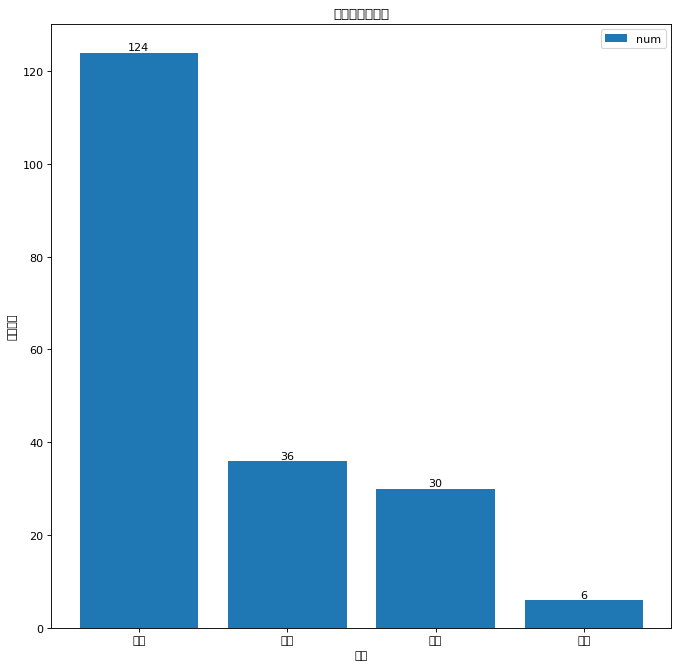

In [26]:
plt.figure(figsize=(10, 10), dpi=80)#设置图形大小，宽为10，高为10，每英寸的点数为80
x = degree[:15].index
y = degree[:15].values
p = plt.bar(x, y, label="num")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('学历')
plt.ylabel('岗位数量')
plt.title('学历与岗位数量')
plt.legend(loc="upper right")#给图加上图例
plt.show()

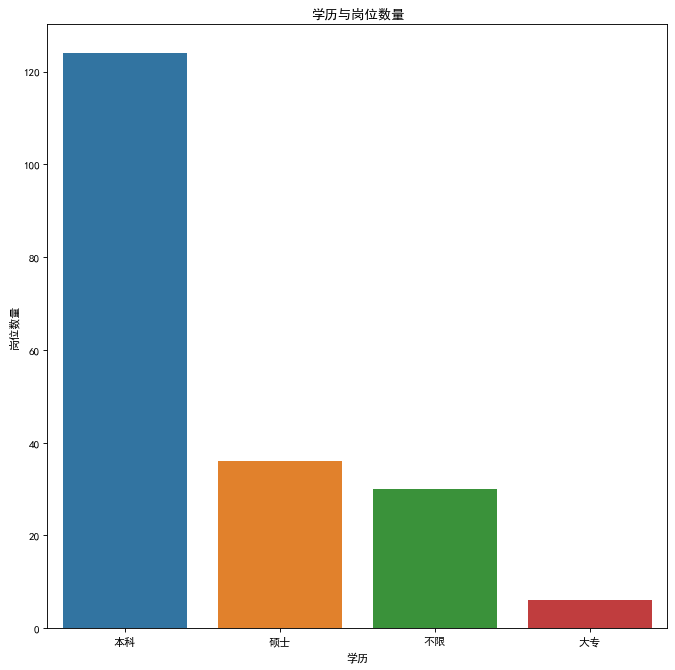

In [46]:
plt.figure(figsize=(10, 10), dpi=80)#设置图形大小，宽为10，高为10，每英寸的点数为80
x = degree[:15].index
y = degree[:15].values
sns.barplot(x=x, y=y, data=job_detailed_data,capsize=.05)
plt.xlabel('学历')
plt.ylabel('岗位数量')
plt.title('学历与岗位数量')
plt.show()

<h3>结论</h3>
<br>
绝大多数岗位对实习生的学历要求是本科及以上，对学历要求是硕士的岗位数量和对学历不做要求差不多，极少数岗位对学历的最低要求是大专。

<h3>4.2城市与岗位数量</h3>

In [27]:
city=job_detailed_data['city'].value_counts()
city

北京    96
上海    42
广州    14
深圳     9
武汉     7
杭州     4
合肥     4
成都     3
南京     3
青岛     2
全国     2
西安     2
宁波     2
福州     1
天津     1
苏州     1
珠海     1
重庆     1
厦门     1
Name: city, dtype: int64

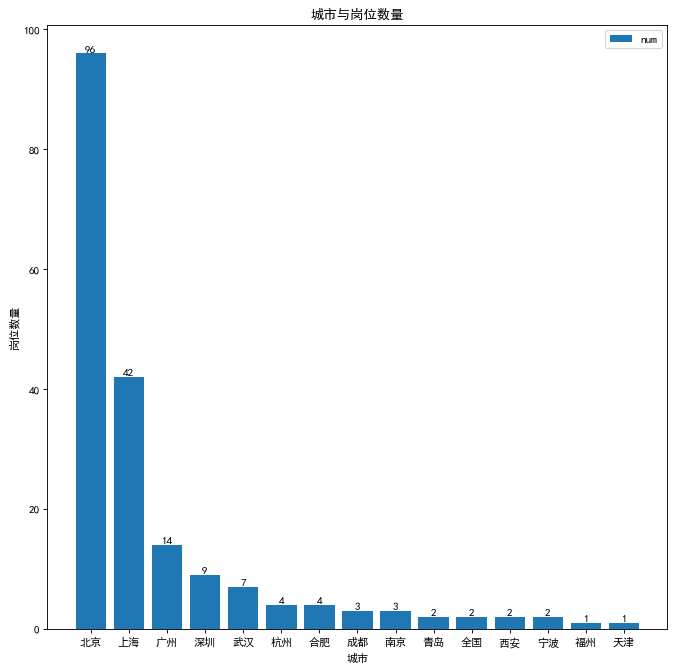

In [32]:
plt.figure(figsize=(10, 10), dpi=80)
x = city[:15].index
y = city[:15].values
p = plt.bar(x, y, label="num")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('城市')
plt.ylabel('岗位数量')
plt.title('城市与岗位数量')
plt.legend(loc="upper right")
plt.show()

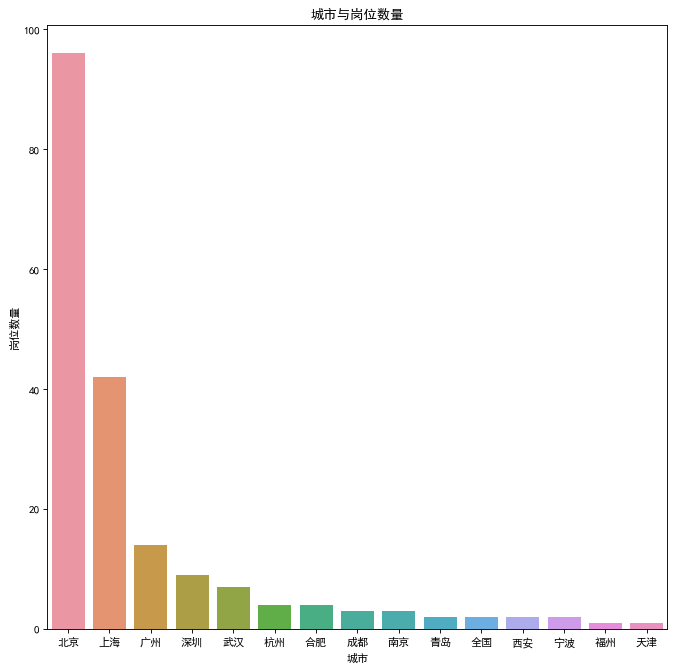

In [33]:
plt.figure(figsize=(10, 10), dpi=80)
x = city[:15].index
y = city[:15].values
sns.barplot(x=x, y=y, data=job_detailed_data,capsize=.05)
plt.xlabel('城市')
plt.ylabel('岗位数量')
plt.title('城市与岗位数量')
plt.show()

<h3>结论</h3>
<br>
一线城市(北京、上海、广州、深圳)特别是北京上海提供的岗位数量相比其他城市多一些,而且北京提供的岗位数量几乎占到这些城市提供的岗位数总和的一半。

<h2>4.3工资分析</h2>

<h3>不同城市、岗位，每日工资最高、最低情况</h3>

In [35]:
#maxsal=job_detailed_data['maxsal'].value_counts()
#maxsal
salary_by_city = job_detailed_data.groupby(['city','iname'])['maxsal','minsal'].mean()
salary_by_city

<ipython-input-35-c168b863a684>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_by_city = job_detailed_data.groupby(['city','iname'])['maxsal','minsal'].mean()


maxsal  minsal
city iname                                
上海   Digital Lab intern      140.0   100.0
     【2018暑期实习】机器学习工程师实习生    260.0   200.0
     人工智能实习生（算法/机器学习/深度学习）   300.0   200.0
     信息系统实习生                 160.0   120.0
     助理分析师（影视制作方向）           150.0   100.0
...                            ...     ...
西安   威胁情报和数据分析研究员实习生（西安）     150.0   100.0
     数据分析实习生                 120.0   100.0
重庆   数据挖掘/机器学习               160.0   100.0
青岛   大数据分析师实习生               200.0   150.0
     大数据工程师实习生              8000.0  5000.0

[158 rows x 2 columns]

平均日薪=(maxsal+minsal)/2

In [38]:
df1=job_detailed_data
df1['平均日薪']=(df1['maxsal']+df1['minsal'])/2
df1.head()

,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction,平均日薪
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶,100.0
1,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐,150.0
2,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位,160.0
3,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战,150.0
4,福州,鼎捷软件,5,本科,实施顾问（PLM）,计算机/互联网,600,500,3,五险一金、法定年假、福利年假、生日礼金、午餐补贴、出差补贴,550.0


<h3>全国的平均月薪</h3>

由于每周工作的时长不同 我们看月薪 每周工作时长X平均日薪X4

In [39]:
df2=df1
df2['月薪']=df2['day']*df2['平均日薪']*4
df2.head()

,city,cname,day,degree,iname,industry,maxsal,minsal,month,attraction,平均日薪,月薪
0,武汉,武汉安天,4,本科,数据挖掘工程师,互联网,120,80,3,弹性工作 周末双休 咖啡下午茶,100.0,1600.0
1,广州,网易游戏,4,本科,语料数据标注实习生-广州,互联网,200,100,8,网络游戏 知名公司 导师制 免费三餐,150.0,2400.0
2,北京,中科院软件所,4,硕士,安全工程师,计算机/互联网,200,120,6,舒适办公环境 领先技术水平 优秀团队 科研单位,160.0,2560.0
3,深圳,IDataAPI,5,本科,自然语言处理（NLP）实习生,企业服务,200,100,6,你将获得持续不断的挑战与能力提升，并与志同道合的伙伴并肩作战,150.0,3000.0
4,福州,鼎捷软件,5,本科,实施顾问（PLM）,计算机/互联网,600,500,3,五险一金、法定年假、福利年假、生日礼金、午餐补贴、出差补贴,550.0,11000.0


In [40]:
print('全国的平均月薪:',df2['月薪'].mean())

全国的平均月薪: 3969.3061224489797


<h3>月薪与城市</h3>

In [41]:
salary_by_city = df2.groupby('city')['月薪'].mean()
salary_by_city

city
上海     2918.761905
全国     3030.000000
北京     3675.291667
南京     2000.000000
厦门     3490.000000
合肥     2575.000000
天津     1440.000000
宁波     3000.000000
广州     3218.857143
成都     1780.000000
杭州     3432.500000
武汉     2685.714286
深圳     3616.000000
珠海     1760.000000
福州    11000.000000
苏州     1560.000000
西安     1690.000000
重庆     2600.000000
青岛    66750.000000
Name: 月薪, dtype: float64

In [42]:
city=job_detailed_data['city'].value_counts()
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))
city_pct

北京    48.98%
上海    21.43%
广州     7.14%
深圳     4.59%
武汉     3.57%
杭州     2.04%
合肥     2.04%
成都     1.53%
南京     1.53%
青岛     1.02%
全国     1.02%
西安     1.02%
宁波     1.02%
福州     0.51%
天津     0.51%
苏州     0.51%
珠海     0.51%
重庆     0.51%
厦门     0.51%
Name: city, dtype: object

In [43]:
salary_by_city_sort = salary_by_city[city_pct.index].sort_values(ascending=False)
salary_by_city_sort

青岛    66750.000000
福州    11000.000000
北京     3675.291667
深圳     3616.000000
厦门     3490.000000
杭州     3432.500000
广州     3218.857143
全国     3030.000000
宁波     3000.000000
上海     2918.761905
武汉     2685.714286
重庆     2600.000000
合肥     2575.000000
南京     2000.000000
成都     1780.000000
珠海     1760.000000
西安     1690.000000
苏州     1560.000000
天津     1440.000000
Name: 月薪, dtype: float64

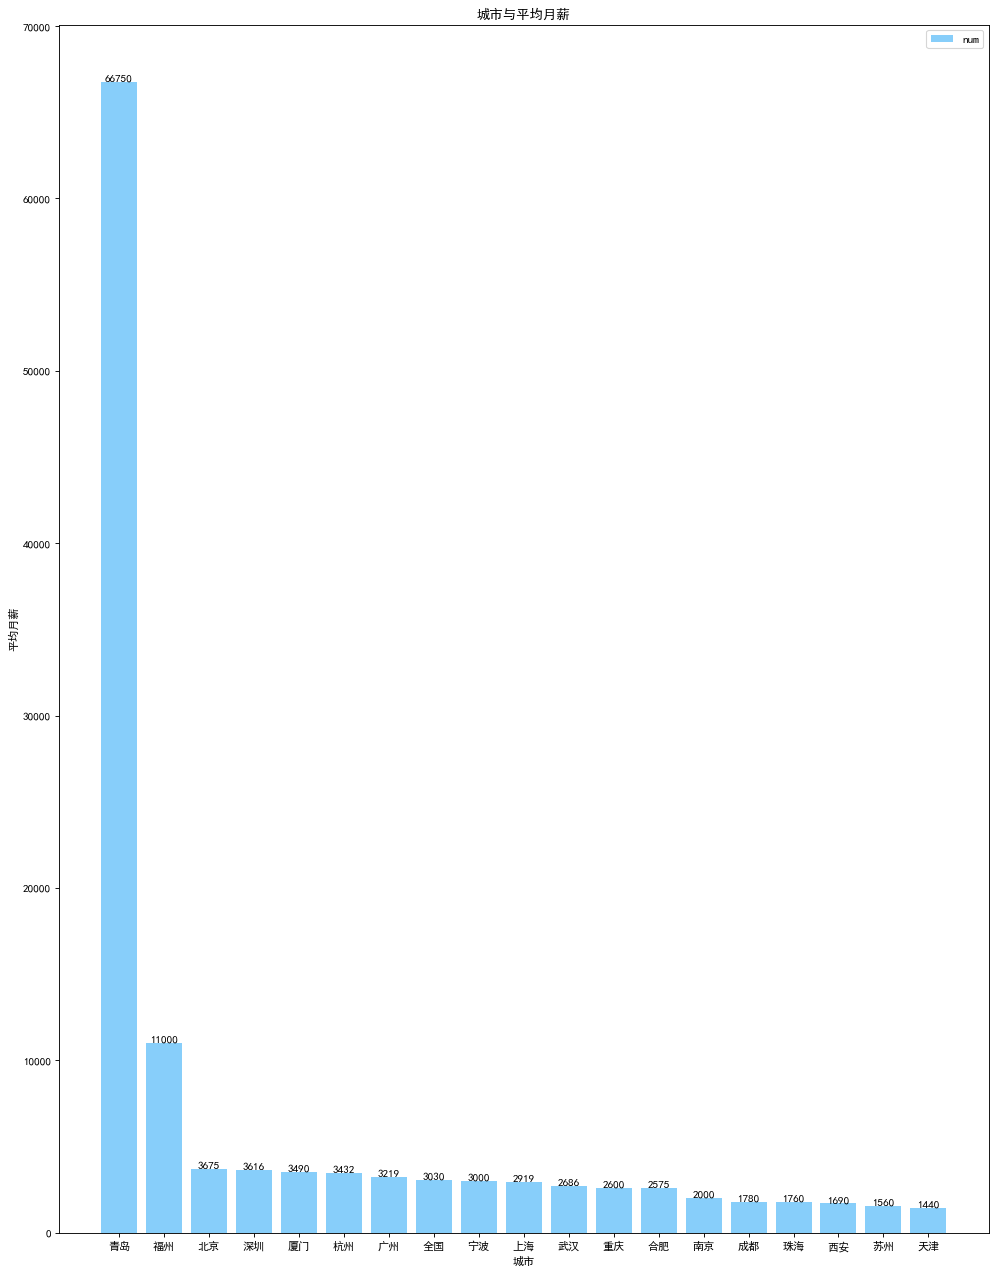

In [47]:
plt.figure(figsize=(15, 20), dpi=80)
x = salary_by_city_sort.index
y = salary_by_city_sort.values
p = plt.bar(x, y, label="num", color="#87CEFA")
for x,y in zip(x,y):
    plt.text(x,y, '%.0f'%y, ha='center',va='bottom')
plt.xlabel('城市')
plt.ylabel('平均月薪')
plt.title('城市与平均月薪')
plt.legend(loc="upper right")
plt.show()

<h3>不同城市、岗位，每日工资最高、最低情况</h3>

In [31]:
#maxsal=job_detailed_data['maxsal'].value_counts()
#maxsal
salary_by_city = job_detailed_data.groupby(['city','iname'])['maxsal','minsal'].mean()
salary_by_city

<ipython-input-31-c168b863a684>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_by_city = job_detailed_data.groupby(['city','iname'])['maxsal','minsal'].mean()


maxsal  minsal
city iname                                
上海   Digital Lab intern      140.0   100.0
     【2018暑期实习】机器学习工程师实习生    260.0   200.0
     人工智能实习生（算法/机器学习/深度学习）   300.0   200.0
     信息系统实习生                 160.0   120.0
     助理分析师（影视制作方向）           150.0   100.0
...                            ...     ...
西安   威胁情报和数据分析研究员实习生（西安）     150.0   100.0
     数据分析实习生                 120.0   100.0
重庆   数据挖掘/机器学习               160.0   100.0
青岛   大数据分析师实习生               200.0   150.0
     大数据工程师实习生              8000.0  5000.0

[158 rows x 2 columns]

<h2>4.4公司规模分析</h2>

In [4]:
df3 = pd.read_csv('E:\\test_com.csv', delimiter=',')
df3

,Unnamed: 0,cname,com_type,description,industry,name,pranum,reg_capi,reg_name,scale
0,0,武汉安天信息技术有限责任公司,有限责任公司(自然人投资或控股),中国互联网应急响应的国家级服务支撑单位之一,互联网,武汉安天,120,270万元人民币,组织机构代码,150-500人
1,1,广州网易互动娱乐有限公司,有限责任公司(台港澳法人独资),国内中国领先的互联网技术公司，游戏行业领导者。,互联网,网易游戏,203,50.000000万元美元,注册号,2000人以上
2,2,中国科学院软件研究所,无,一所致力于计算机科学理论和软件高新技术的研究与发展的综合性基地型研究所,计算机/互联网,中科院软件所,1,无,注册号,500-2000人
3,3,广州简亦迅信息科技有限公司,有限责任公司(自然人投资或控股),一家稳步发展的互联网企业服务创业公司,企业服务,IDataAPI,0,50万人民币,注册号,15-50人
4,4,鼎捷软件股份有限公司,股份有限公司（中外合资、上市）,亚太区值得信赖的企业管理软件与服务供应商,计算机/互联网,鼎捷软件,1,26470.9943万人民币,注册号,2000人以上
...,...,...,...,...,...,...,...,...,...,...
161,161,百度在线网络技术(北京)有限公司,有限责任公司(外国法人独资),全球最大的中文搜索引擎,互联网,百度,148,4520 万元 美元,注册号,2000人以上
162,162,妙计旅行,无,用最聪明的方式去旅行,在线旅游,妙计旅行,1,无,注册号,50-150人
163,163,五洲万象（北京）科技有限公司,有限责任公司(自然人投资或控股),一家面向海外互联网市场的初创企业,互联网,Baca,3,100 万元 人民币,注册号,50-150人
164,164,北京车之家信息技术有限公司,有限责任公司(自然人投资或控股),中国最值得信赖的汽车互联网服务平台,互联网,汽车之家,1,1000 万元,注册号,500-2000人


In [43]:
print('进行数据清洗之后的数据行数:',len(df3))

进行数据清洗之后的数据行数: 166


In [5]:
df3.loc[:,'scale'].value_counts()

2000人以上      42
50-150人      36
500-2000人    33
150-500人     28
15-50人       23
少于15人         3
500-1000人     1
Name: scale, dtype: int64

大型企业：42    中型企业：34     小型企业：90

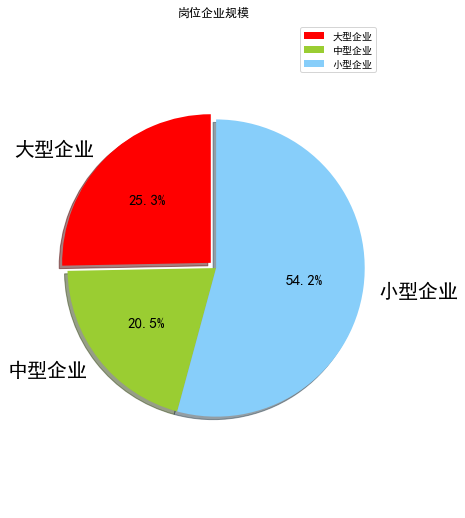

In [6]:
plt.figure(figsize=(6,9))
#定义饼状图的标签，标签是列表
labels = [u'大型企业',u'中型企业',u'小型企业']
#每个标签占多大，会自动去算百分比
sizes = [42,34,90]
colors = ['red','yellowgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0.05,0,0)
 
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
# 参数：
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
 
#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('岗位企业规模')
plt.legend()
plt.show()

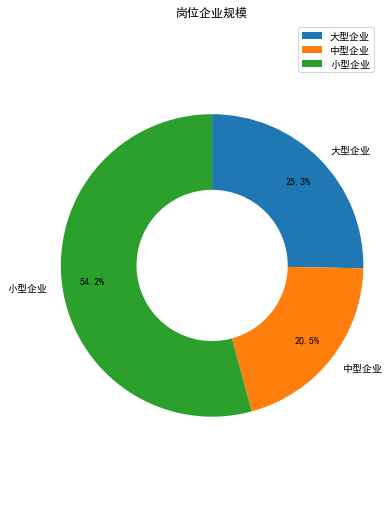

In [9]:
plt.figure(figsize=(6,9))
labels = [u'大型企业',u'中型企业',u'小型企业']
#每个标签占多大，会自动去算百分比
sizes = [42,34,90]
plt.pie(sizes, labels=labels, startangle = 90,autopct = '%3.1f%%',pctdistance = 0.8,
        counterclock = False, wedgeprops = {'width' : 0.5});

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.title('岗位企业规模')
plt.legend()
plt.show()